# Example: TGV

In [7]:
import lettuce as lt
import matplotlib.pyplot as plt
import numpy as np

In [8]:
lattice = lt.Lattice(lt.D2Q9, device = "cuda:0", use_native=False)
flow = lt.TaylorGreenVortex2D(resolution=256, reynolds_number=10000, mach_number=0.05, lattice=lattice)
collision = lt.BGKCollision(lattice, tau=flow.units.relaxation_parameter_lu)
streaming = lt.StandardStreaming(lattice)
simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)
energyspectrum = lt.EnergySpectrum(lattice, flow)
reporter = lt.ObservableReporter(energyspectrum, interval=500, out=None)
simulation.reporters.append(reporter)

steps     time     EnergySpectrum


### Initialized flow
The initialized velocity is randomly generated and depends on the wavenumber peak k0, the initial energy, which are given in the flow constructor, and a given energy spectrum.

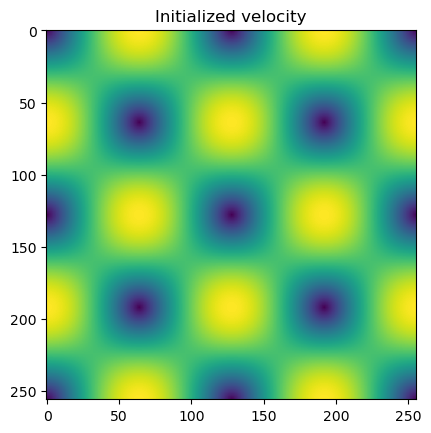

In [10]:
u = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).cpu().numpy()
u_norm = np.linalg.norm(u,axis=0)
plt.imshow(u_norm)
plt.title('Initialized velocity')
plt.show()

### Energy spectrum
The energy spectrum, which is forced in the beginning is given with:

## Run simulation
Before the simulation is executed, the pressure field is obtained by solving the pressure poisson equation. In addition, f_neq is initialized to obtain stress tensor at the start of the simulation.

In [11]:
simulation.initialize_pressure()
simulation.initialize_f_neq()
mlups = simulation.step(num_steps=15000)
print("Performance in MLUPS:", mlups)

Performance in MLUPS: 121.61345188640938


### Velocity
* Velocity field after the simulation

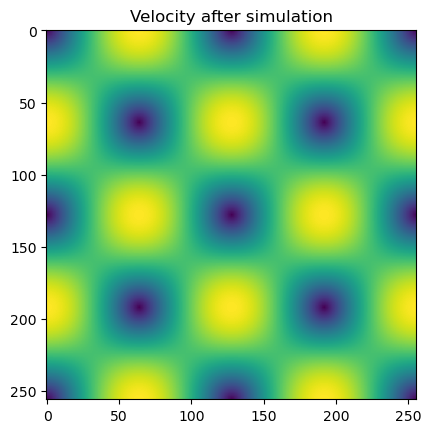

In [13]:
u = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).cpu().numpy()
u_norm = np.linalg.norm(u,axis=0)
plt.imshow(u_norm)
plt.title('Velocity after simulation')
plt.show()

### Vorticity
* Vorticity field after the simulation

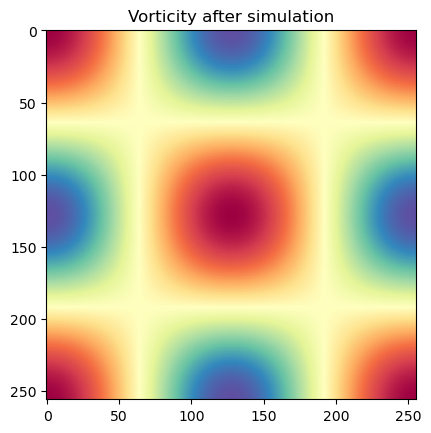

In [14]:
dx = flow.units.convert_length_to_pu(1.0)
grad_u0 = np.gradient(u[0], dx)
grad_u1 = np.gradient(u[1], dx)
vorticity = (grad_u1[0] - grad_u0[1])
plt.imshow(vorticity, cmap='Spectral')
plt.title('Vorticity after simulation')
plt.show()